In [3]:
#importing modules in use
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

plt.rcParams['text.usetex'] = True #To use LaTEX fonts
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

## Learning Curve

In [4]:
#Saving folder for plots

#CHANGE THIS FOLDER PATH BEFORE PROCEDDING
#ANALYSIS = '/home/sharmas/mydrive/SabIA/HDNNP/DABQDI/analysis/6Rc1000Ep_NN6_27Sept2022'


In [5]:
FILE = '/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/H2O-Bing/nnp-train/NN7-3513751--80-20/learning-curve.out'
with open(FILE, 'r') as f:
    #header = f.readlines()[32:33]
    file = f.readlines()[34:]
    mat = np.array([s.split() for s in file], dtype= np.float64)
    #header = [d.split() for d in header]
    f.close()

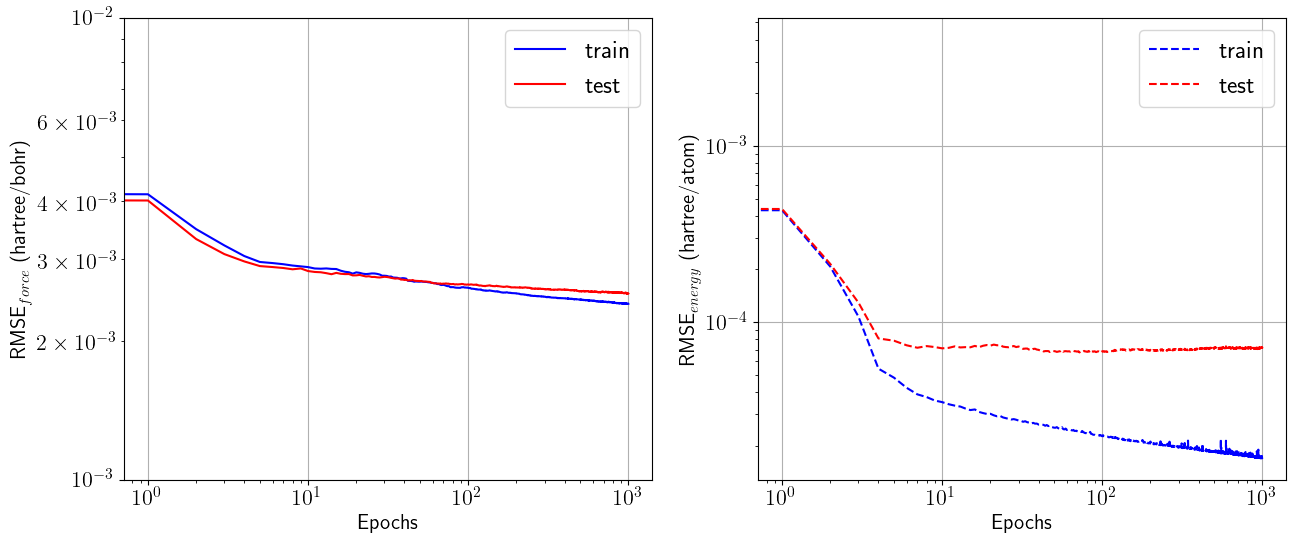

total epochs: 1001
RMSE train (energy): 1.6868978e-05 eV/atom	RMSE test (energy) 6.73977143e-05 eV/atom
RMSE train (force): 0.00239946307 eV/A	RMSE test (force) 0.00252513432 eV/A
Lowest RMSE force test set position :: (array([995]),)


In [8]:
#LEARNING CURVE PLOT

plt.figure(figsize = (15, 6))

plt.subplot(1,2,1)
plt.grid()
plt.plot(mat[:,0], mat[:, 9], color = 'b', label= 'train')
plt.plot(mat[:,0], mat[:, 10], color= 'r', label= 'test')
plt.xlabel('Epochs', fontsize = 15)
#plt.ylabel(r'RMSE$_{force}$ (eV/\AA)', fontsize = 15)
plt.ylabel(r'RMSE$_{force}$ (hartree/bohr)', fontsize = 15)
plt.legend(prop={'size': 18})
#plt.xlim(40, 45)
plt.ylim(0.001, 0.01)
plt.yscale('log')
plt.xscale('log')

plt.subplot(1,2,2)
plt.grid()
plt.plot(mat[:,0], mat[:, 1], color = 'b', label= 'train', linestyle = '--')
plt.plot(mat[:,0], mat[:, 2], color= 'r', label= 'test', linestyle = '--')
plt.xlabel('Epochs', fontsize = 15)
#plt.ylabel(r'RMSE$_{energy}$ (eV/atom)', fontsize = 15)
plt.ylabel(r'RMSE$_{energy}$ (hartree/atom)', fontsize = 15)
plt.legend(prop={'size': 18})
# plt.xlim(50, 60)
#plt.ylim(0.001, 0.01)
plt.yscale('log')
plt.xscale('log')




#plt.savefig(os.path.join(ANALYSIS, 'RMSE_En.png'), dpi =400)
#plt.savefig('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/H2O-Bing/analysis/seed-9812345/learning-curve-force.pdf', dpi = 300, bbox_inches = 'tight', format = 'pdf')
plt.show()
print(f"total epochs: {len(mat[:,0])}")
print(f"RMSE train (energy): {min(mat[:,1])} eV/atom\tRMSE test (energy) {min(mat[:,2])} eV/atom")
print(f"RMSE train (force): {min(mat[:,9])} eV/A\tRMSE test (force) {min(mat[:,10])} eV/A")

print(f"Lowest RMSE force test set position :: {np.where(mat[0:,10] == min(mat[0:,10]))}")


# print(f"RMSE train (energy): {min(mat[:,1])}\tRMSE test (energy) {min(mat[:,2])}")
# print(f"RMSE train (energy): {min(mat[:,1])}\tRMSE test (energy) {min(mat[:,2])}")

#print(mat[1:,0])
#print(mat[:,3])


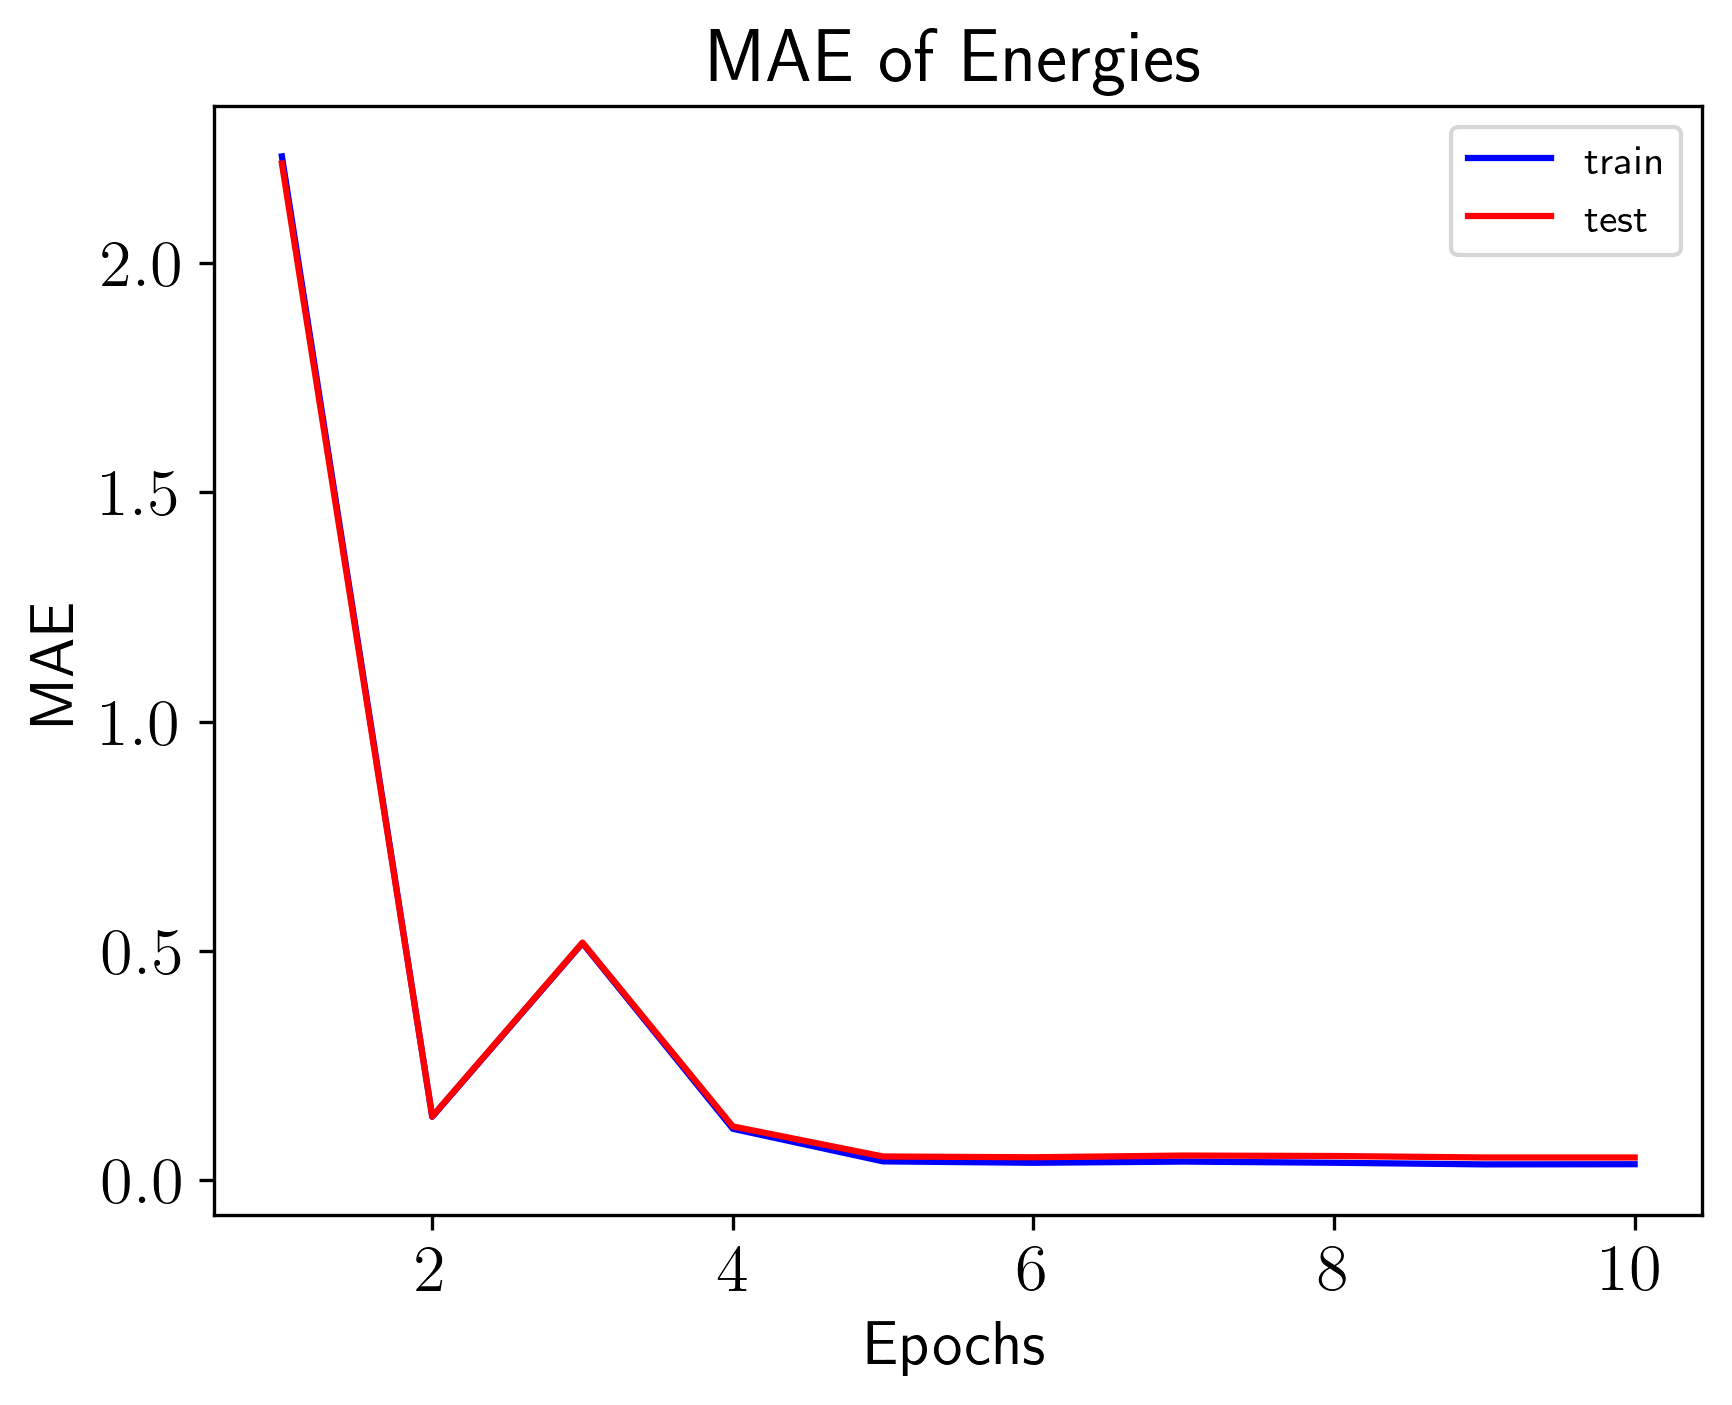

In [6]:
plt.figure(dpi = 300)
plt.plot(mat[1:,0], mat[1:,7], color = 'b', label= 'train')
plt.plot(mat[1:,0], mat[1:,8], color= 'r', label= 'test')
#plt.yscale('log')
#plt.xscale('log')
plt.title('MAE of Energies', fontsize = 18)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.legend()
#plt.xlim(1, 101)
#plt.ylim(0, 1)
#plt.savefig(os.path.join(ANALYSIS, 'MAE_En.png'), dpi =400)
plt.show()

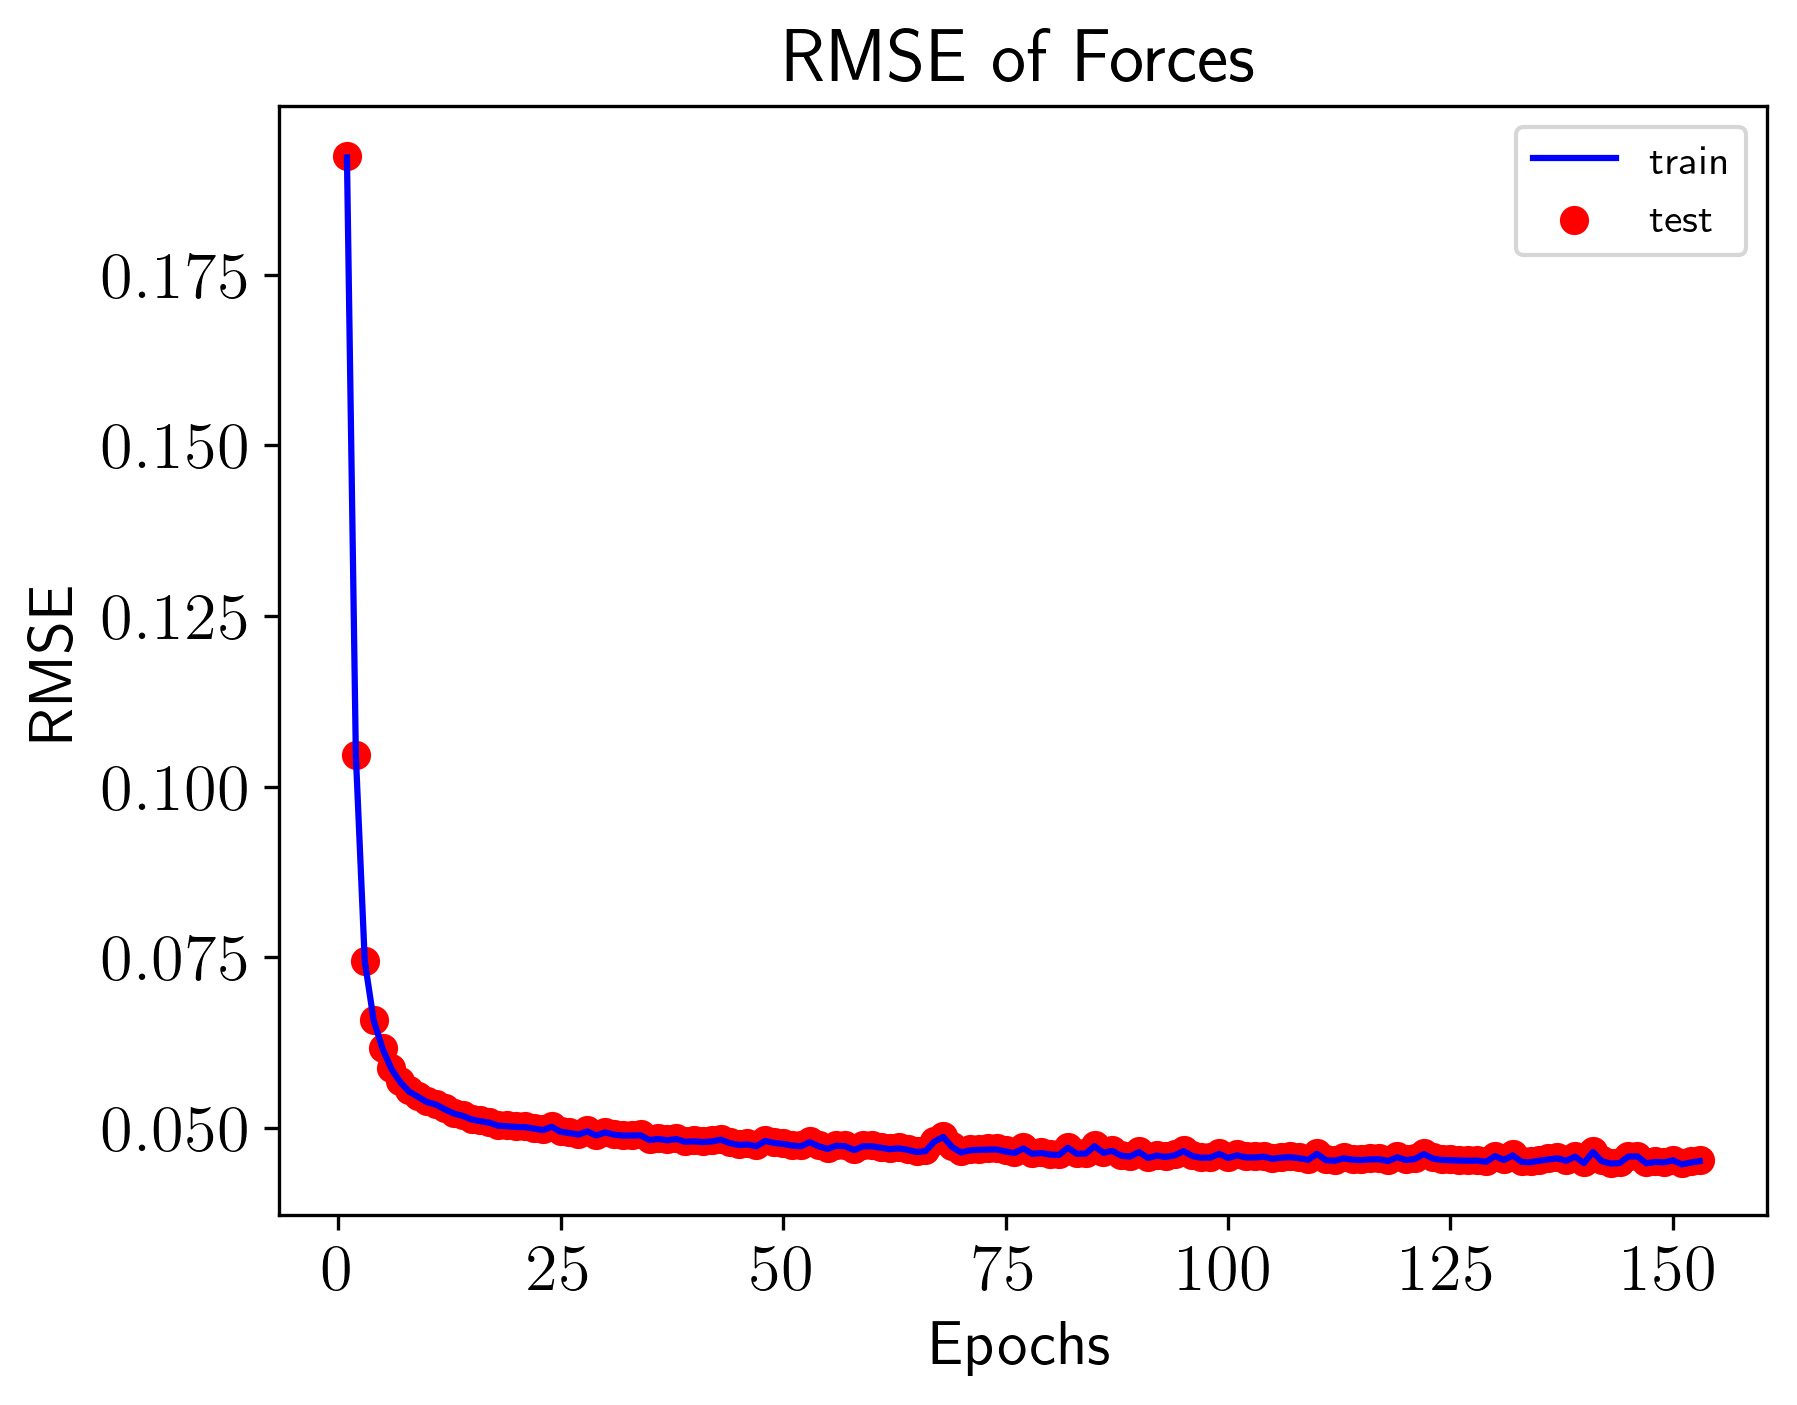

0.0447042668 0.0448344671


In [9]:
plt.figure(dpi = 300)
plt.plot(mat[1:,0], mat[1:,9], color = 'b', label= 'train')
plt.scatter(mat[1:,0], mat[1:,10], color= 'r', label= 'test')
#plt.yscale('log')
#plt.xscale('log')
plt.title('RMSE of Forces', fontsize = 18)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('RMSE', fontsize = 15)
plt.legend()
#plt.xlim(1, 1000)
#plt.ylim(0, 100)
#plt.savefig(os.path.join(ANALYSIS, 'RMSE_Fr.png'), dpi =400)
plt.show()

print(min(mat[:,9]), min(mat[:,10]))

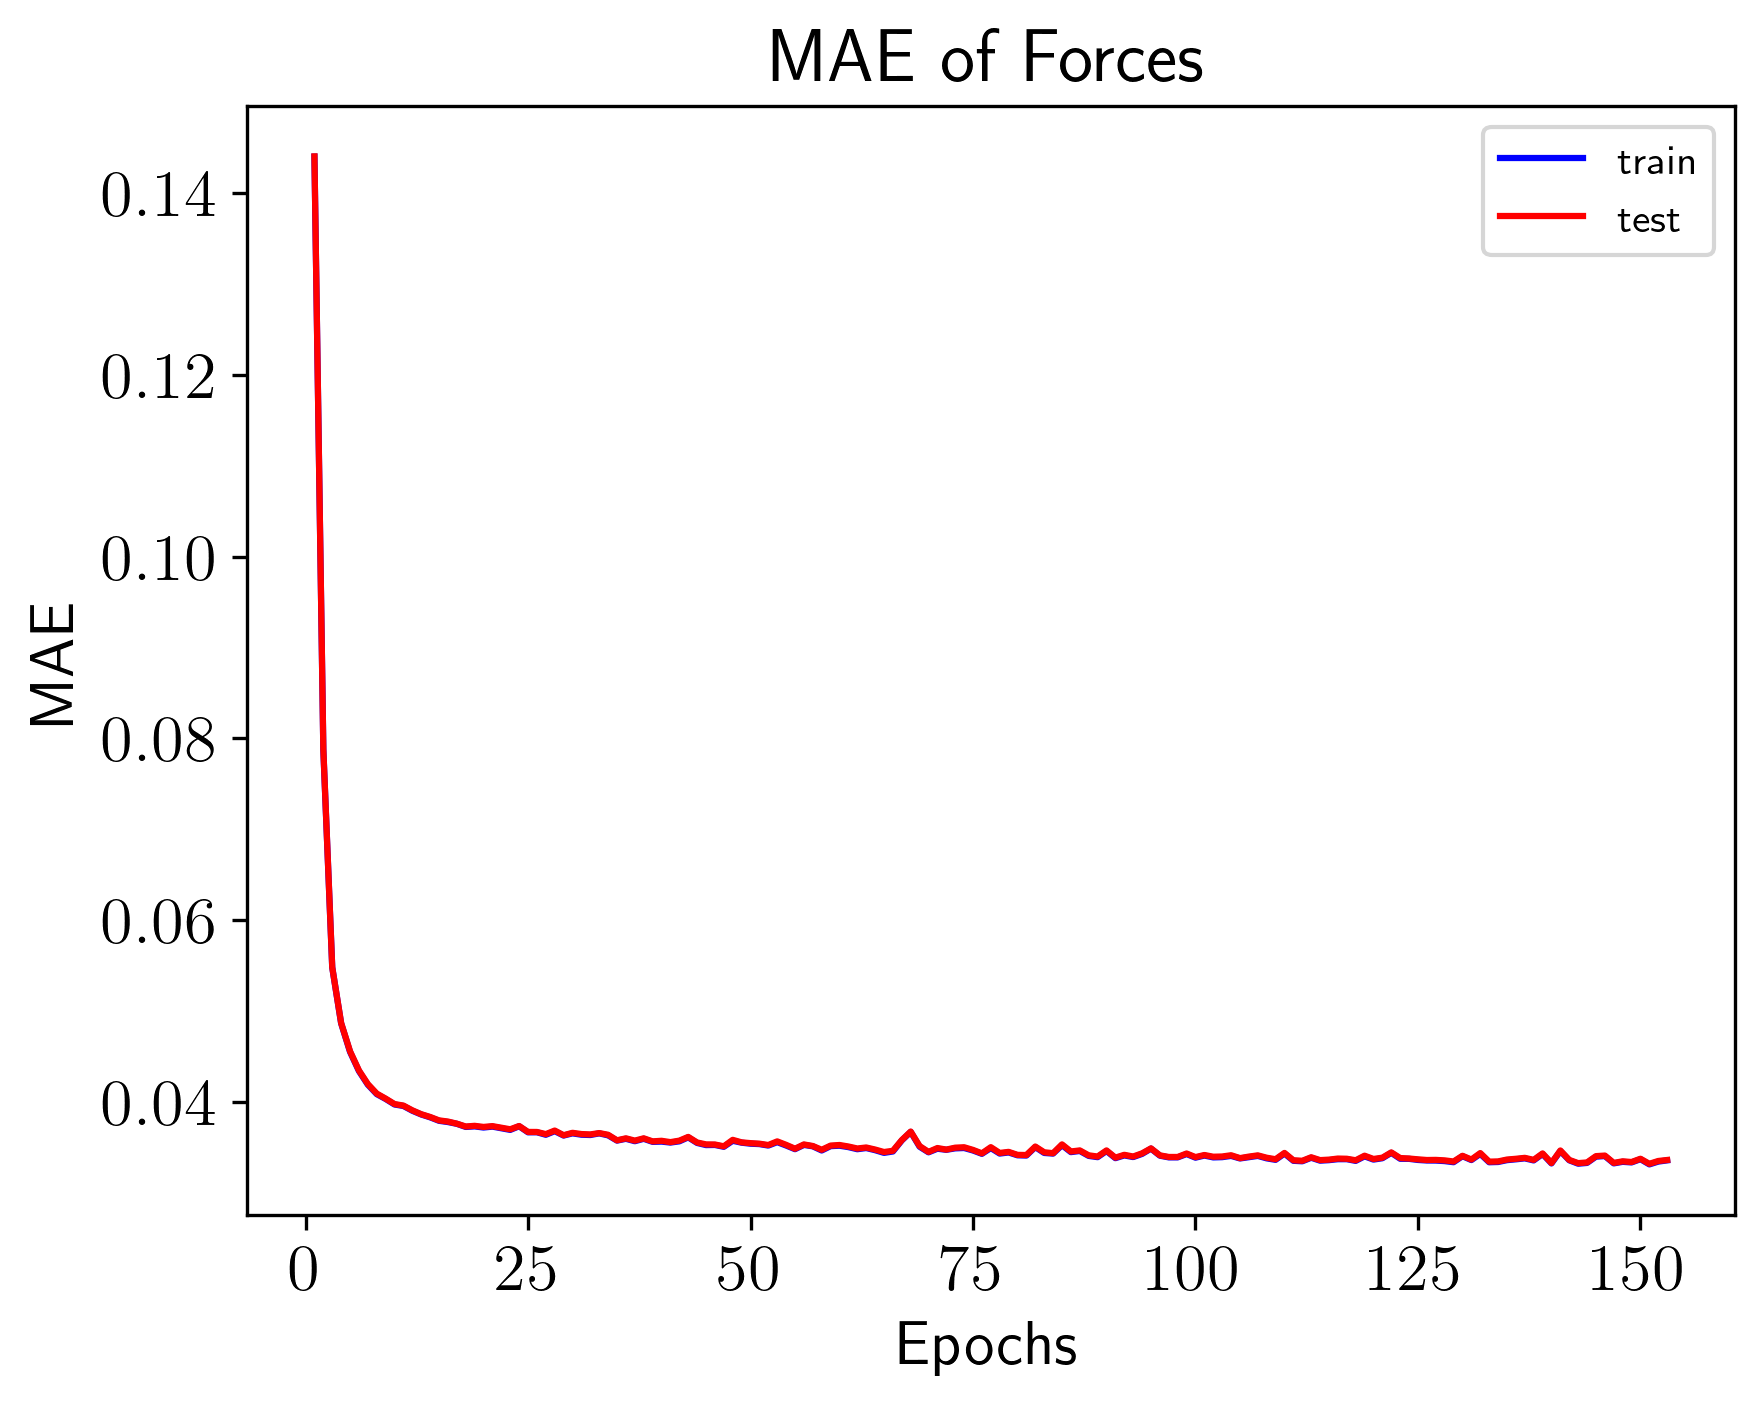

In [8]:
plt.figure(dpi = 300)
plt.plot(mat[1:,0], mat[1:,11], color = 'b', label= 'train')
plt.plot(mat[1:,0], mat[1:,12], color= 'r', label= 'test')
#plt.yscale('log')
#plt.xscale('log')
plt.title('MAE of Forces', fontsize = 18)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('MAE', fontsize = 15)
plt.legend()
#plt.xlim(1, 101)
#plt.ylim(0, 1)
#plt.savefig(os.path.join(ANALYSIS, 'MAE_Fr.png'), dpi =400)
plt.show()

In [21]:
with open('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene-RS/NN1/nnp-train/nnp-train-AL3-7.5A-90-10/energy.data', 'r') as f:
    file = f.readlines()
    mat = np.array([s.split() for s in file], dtype= np.float64)
    #lst = [s.split('\n') for s in file] dtype= float]
#print(mat[:,0])
plt.figure(figsize= (8,6), dpi = 300)
fig= sns.histplot(mat[:,0], bins=1  00, kde= True, stat= 'count', color= 'b')
fig.set_xlabel("eV", fontsize = 15)
fig.set_ylabel("Count", fontsize = 15)
plt.title('Energy distribution of train data', fontsize =18)
#plt.savefig(os.path.join(ANALYSIS, 'Dis_En_train.png'), dpi =400)
plt.show()

SyntaxError: expected 'else' after 'if' expression (2563773997.py, line 7)

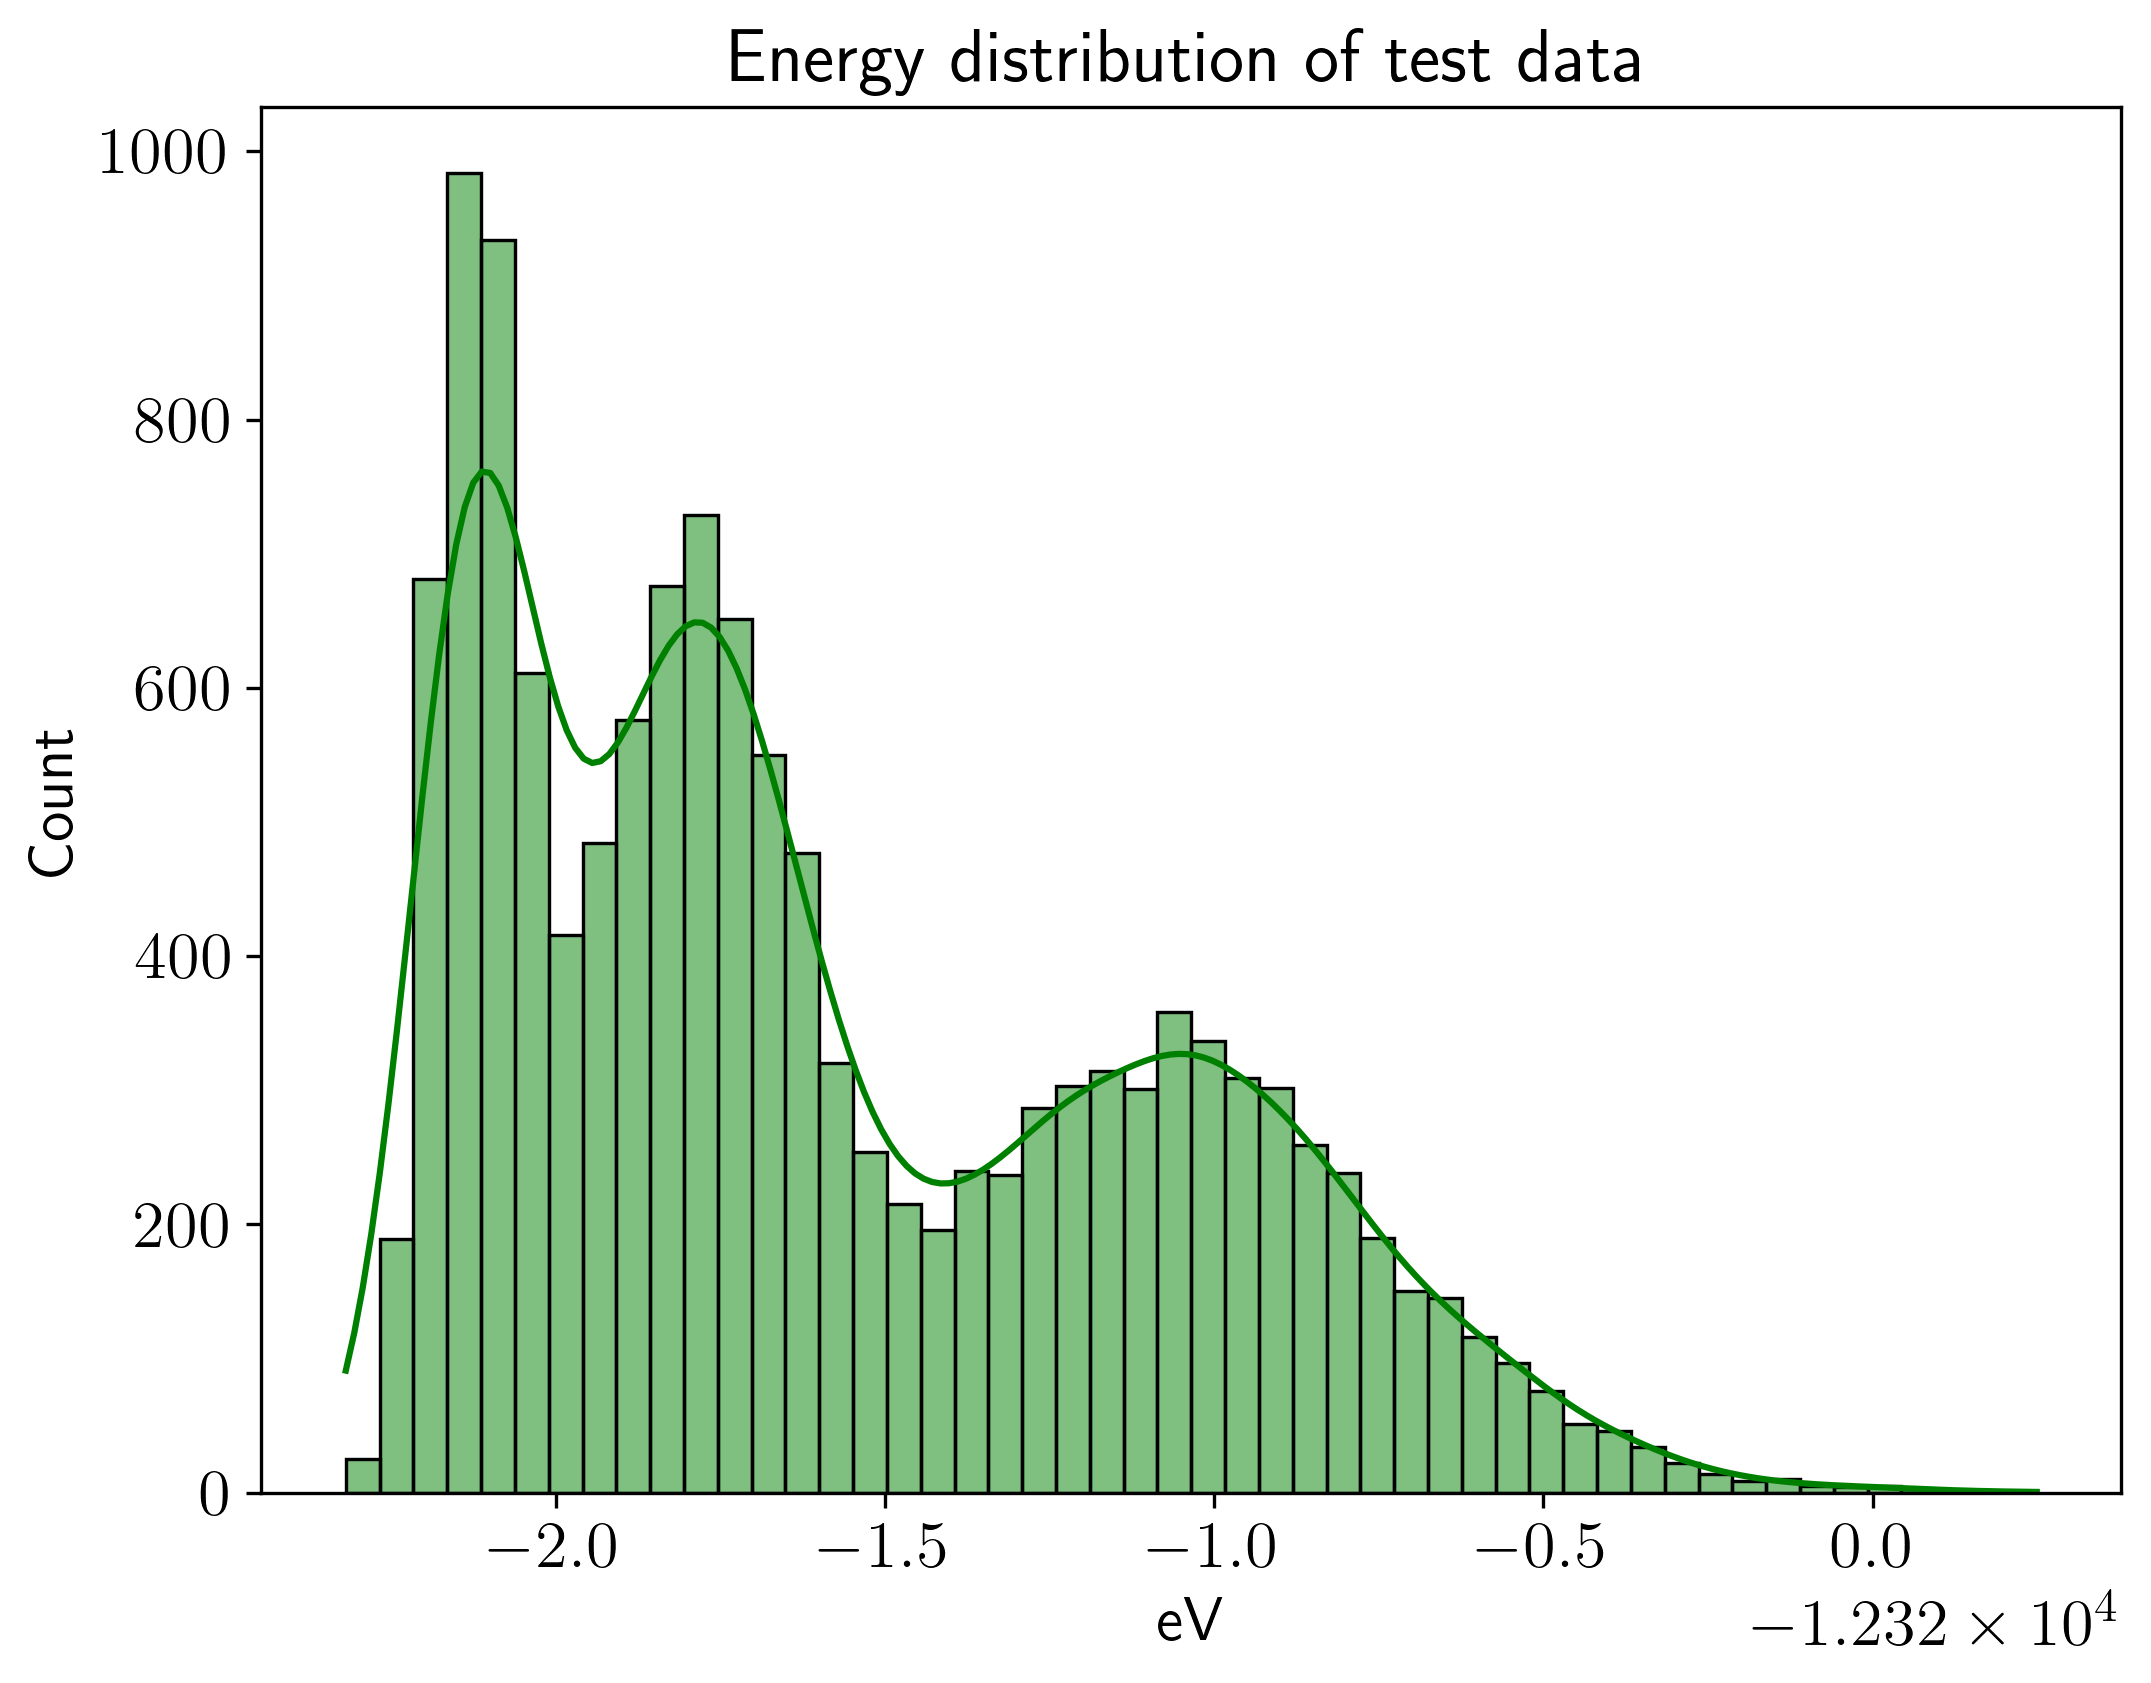

In [48]:
#TEST DATA ENERGY DISTRIBUTION

# with open('/home/sharmas/mydrive/SabIA/HDNNP/DABQDI/nnp-train/blyp_XC/6Rc100Ep_NN1_10Sept2022/energy_test_data.dat', 'r') as f:
#     file = f.readlines()
#     mat = np.array([s.split() for s in file], dtype= np.float64)
    
# plt.figure(figsize= (8,6), dpi = 300)
# fig= sns.histplot(mat[:,0], bins=50, kde= True, stat= 'count', color= 'g')
# fig.set_xlabel("eV", fontsize = 15)
# fig.set_ylabel("Count", fontsize = 15)
# plt.title('Energy distribution of test data', fontsize = 18)
# plt.savefig(os.path.join(ANALYSIS, 'Dis_En_test.png'), dpi =400)
# plt.show()

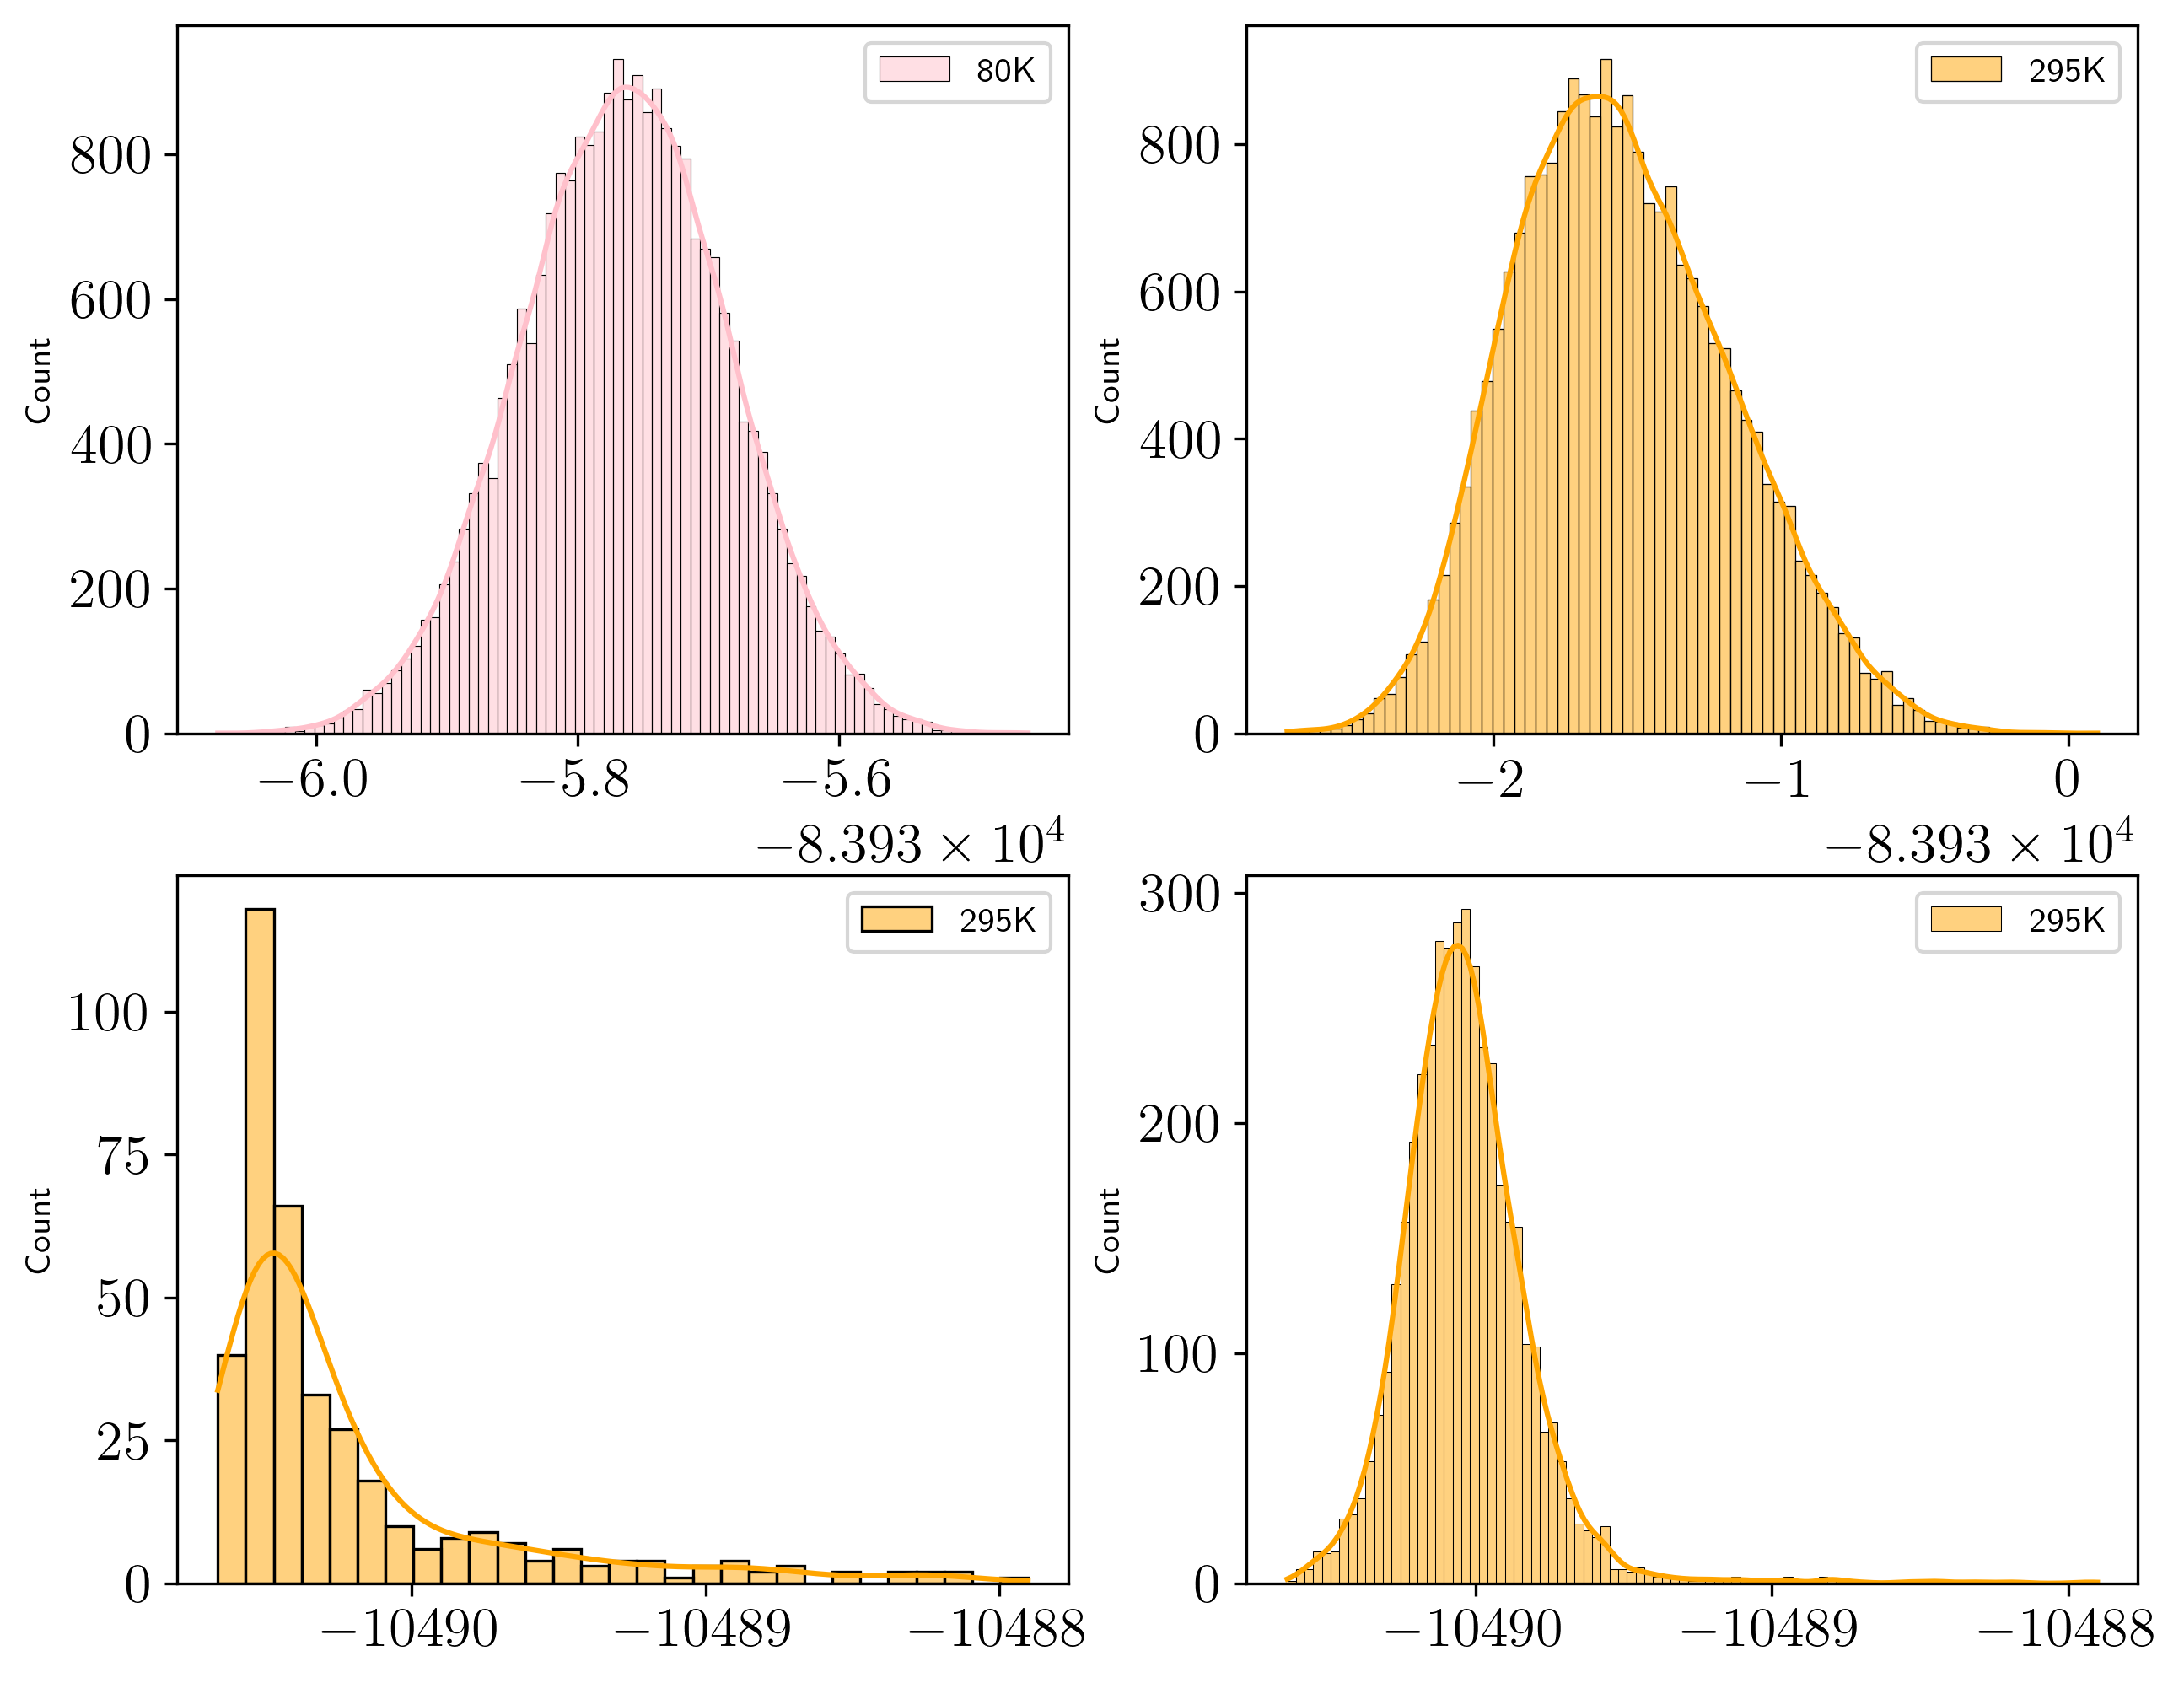

In [4]:
#Comparing the energy distribution

temp_295K_en = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/nnp-dataset/295K/energy.data.295K')
temp_80K_en = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/nnp-dataset/80K/energy.data.80K')
temp_80K_en_primitive = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/data-generation-extra/MD_80K/energy.data.80K.prim')
temp_295K_en_primitive = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/data-generation-extra/MD_295K/energy.data.295K.prim')


plt.figure(figsize= (10, 8), dpi = 300)
plt.subplot(2, 2, 1)
sns.histplot(temp_80K_en, color= 'pink', kde = True, label = '80K')
plt.legend()
plt.subplot(2, 2, 2)
sns.histplot(temp_295K_en, color= 'orange', kde = True, label = '295K')
plt.legend()
plt.subplot(2, 2, 3)
sns.histplot(temp_80K_en_primitive, color= 'orange', kde = True, label = '295K')
plt.legend()
plt.subplot(2, 2, 4)
sns.histplot(temp_295K_en_primitive, color= 'orange', kde = True, label = '295K')
plt.legend()

# plt.savefig('relative-energy-Naphthalene.jpg', dpi = 600)
plt.show()

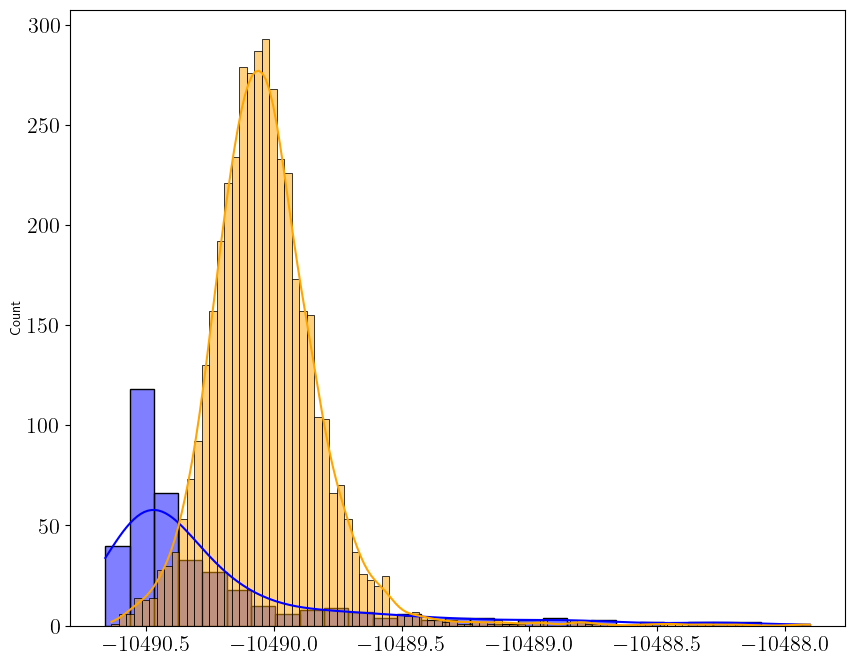

In [9]:
plt.figure(figsize= (10, 8))

#sns.histplot(temp_80K_en, color= 'red', kde = True, label = '80K', alpha = 0.5)
#sns.histplot(temp_295K_en, color= 'green', kde = True, label = '295K', alpha = 0.5)
sns.histplot(temp_80K_en_primitive, color= 'blue', kde = True, label = '80K', alpha = 0.5)
sns.histplot(temp_295K_en_primitive, color= 'orange', kde = True, label = '295K', alpha = 0.5)

plt.show()


In [50]:
#PLOTTING NEIGHBORS

# with open('/home/sharmas/mydrive/SabIA/HDNNP_dabqdi/training/test5/neighbors.out', 'r') as f:
#     #header = f.readlines()[32:33]
#     file = f.readlines()[14:]
#     mat = np.array([s.split() for s in file], dtype= np.float64)
#     #header = [d.split() for d in header]
#     f.close()

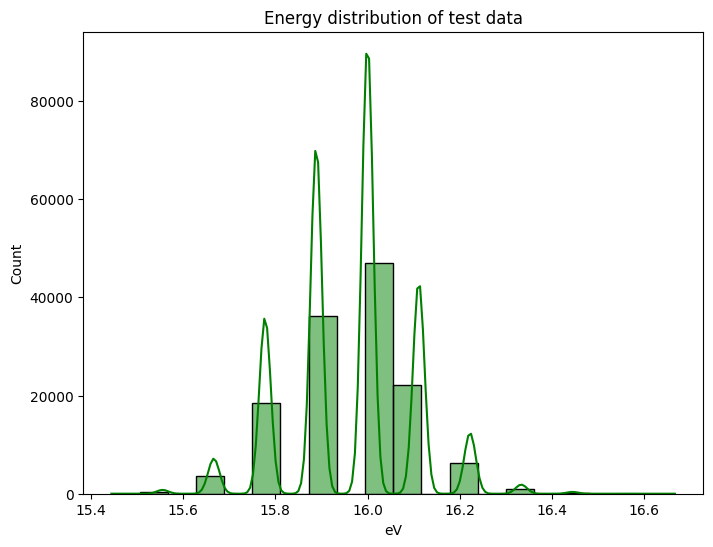

15.961285971886758
15.4444444 16.6666667


In [64]:
# plt.figure(figsize= (8,6))
# fig= sns.histplot(mat[:,4], bins=20, kde= True, stat= 'count', color= 'g')
# fig.set_xlabel("eV")
# plt.title('Energy distribution of test data')
# plt.show()

# print(np.mean(mat[:,4]))
# print(np.min(mat[:,4]), np.max(mat[:,4]))

## Timing data 

In [35]:
#TIMING DATA

# with open('/home/sharmas/mydrive/SabIA/HDNNP/DABQDI/nnp-train/blyp_XC/6Rc100Ep_NN2_16Sept2022/timing.out', 'r') as f:
#     #header = f.readlines()[32:33]
#     file = f.readlines()[36:]
#     mat = np.array([s.split() for s in file], dtype= np.float64)
#     #header = [d.split() for d in header]
#     f.close()


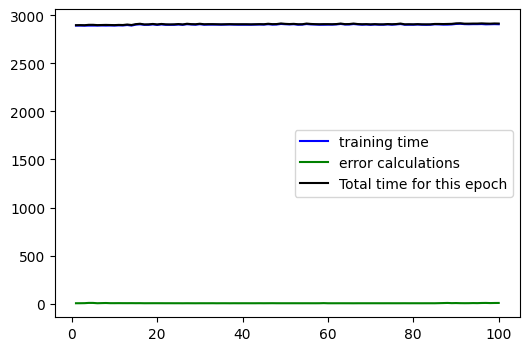

In [36]:
# plt.figure(figsize= (6,4))
# plt.plot(mat[:,0], mat[:, 1], 'b', label= 'training time')
# #plt.plot(mat[:, 0], mat[:, 3], 'r', label= 'error calculations')
# plt.plot(mat[:,0], mat[:,3], 'g', label= 'error calculations')
# plt.plot(mat[:,0], mat[:, 5], 'k', label= 'Total time for this epoch')
# plt.legend()
# plt.xlabel= 'epochs'
# plt.ylabel= 'Time'
# plt.title= 'Time data for training loop'
# plt.show()

In [152]:
#ON THE FLY CORRELATION PLOTS

# with open('/home/sharmas/mydrive/SabIA/HDNNP_dabqdi/training/test5/testpoints.000100.out', 'r') as f:
#     #header = f.readlines()[32:33]
#     file = f.readlines()[12:]
#     mat = np.array([s.split() for s in file], dtype= np.float64)
#     #header = [d.split() for d in header]
#     f.close()

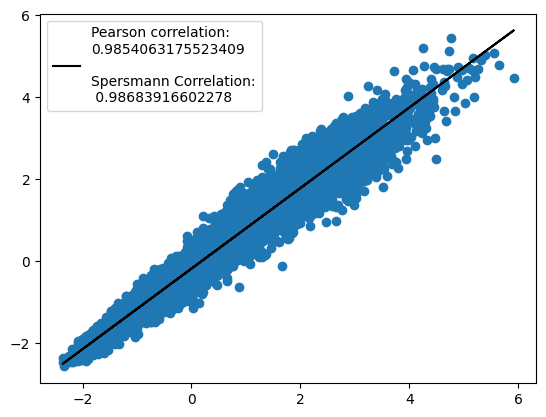

In [153]:
# import scipy
# plt.scatter(mat[:,1], mat[:,2])
# slope, intercept, r, p, stderr = scipy.stats.linregress(mat[:,1], mat[:,2])

# pr= scipy.stats.pearsonr(mat[:,1], mat[:,2])[0]
# sp= scipy.stats.spearmanr(mat[:,1], mat[:,2])[0] 
# plt.plot(mat[:,1], intercept + slope * mat[:,1], c='k', label = f'Pearson correlation:\n{pr}\n\nSpersmann Correlation:\n {sp}')
# #print(scipy.stats.spearmanr(mat[:,1], mat[:,2])[0])
# plt.legend()
# plt.show()

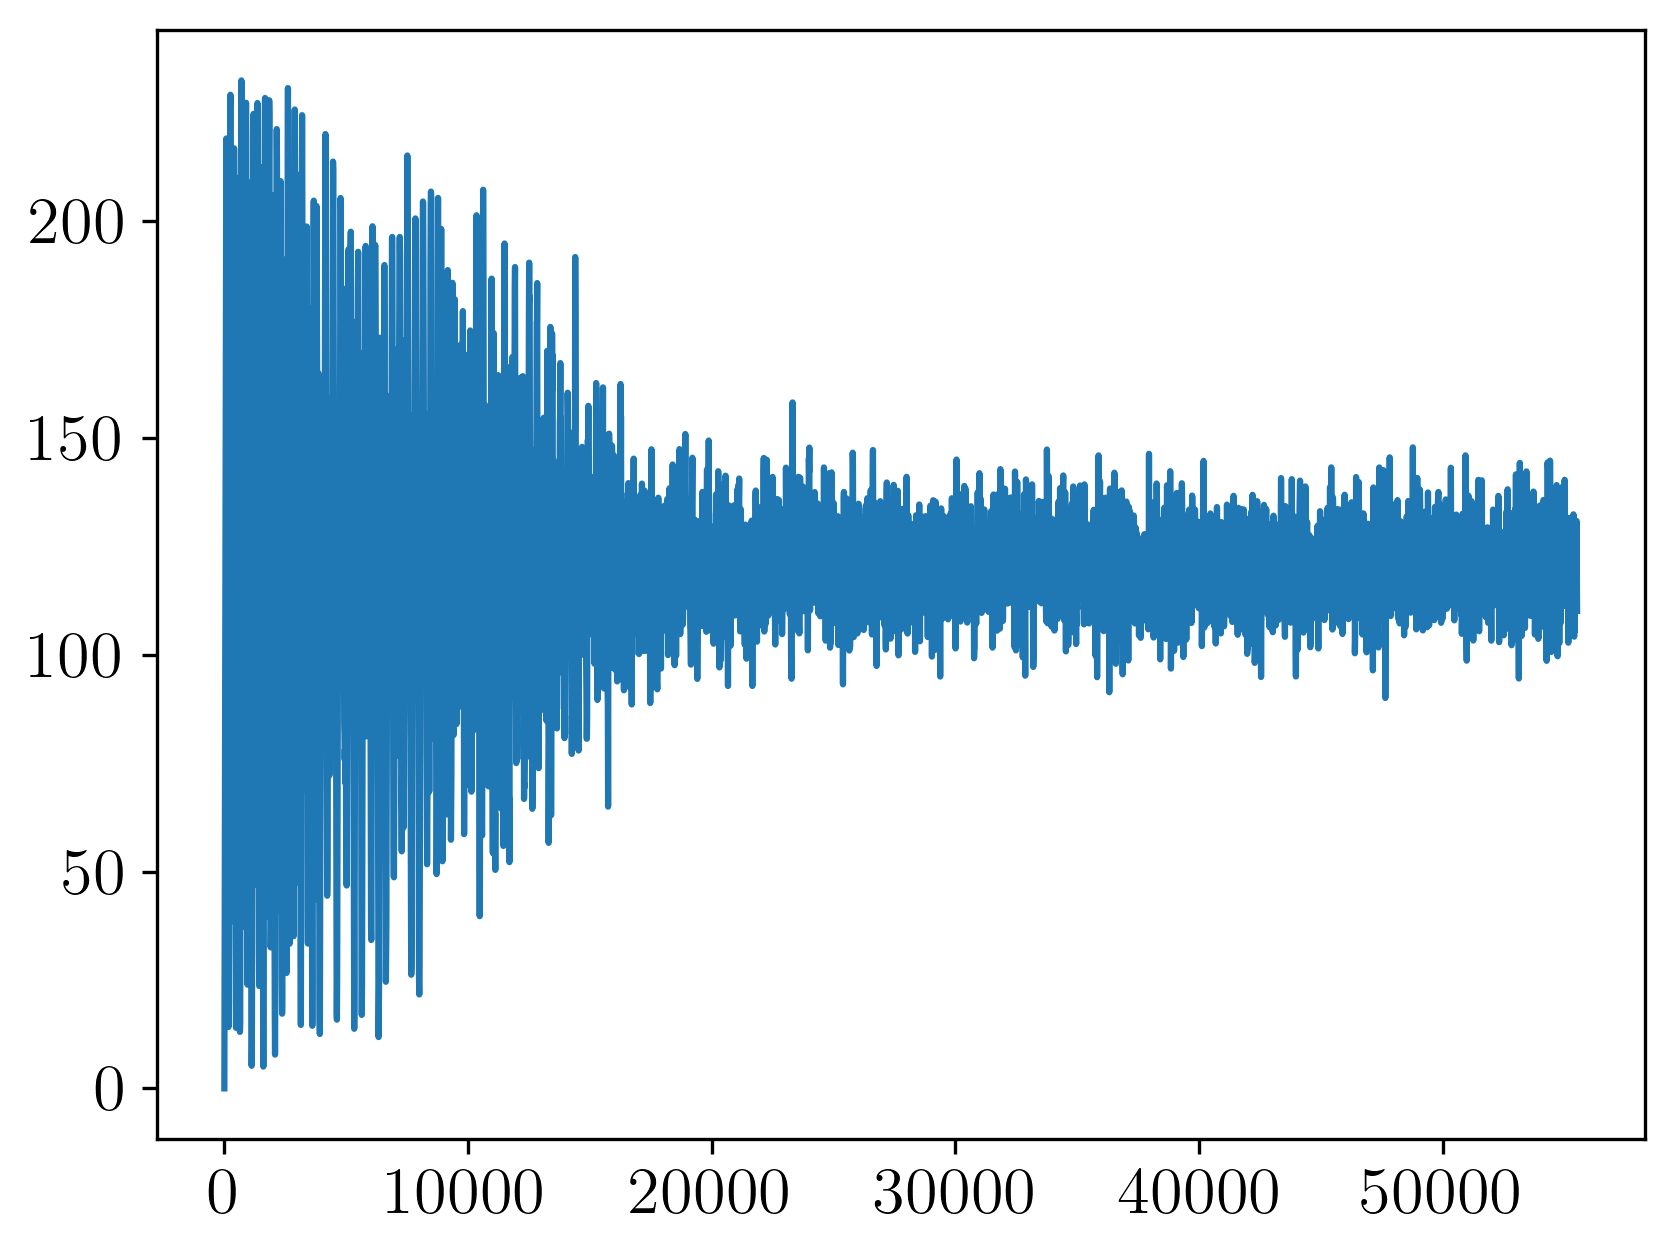

In [48]:
# plt.figure(dpi = 300)
# newfile = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/post_MD/crystal_naph/nvt_120K/1-2-2/curve.data')

# plt.plot(newfile[:, 0], newfile[:, 1])

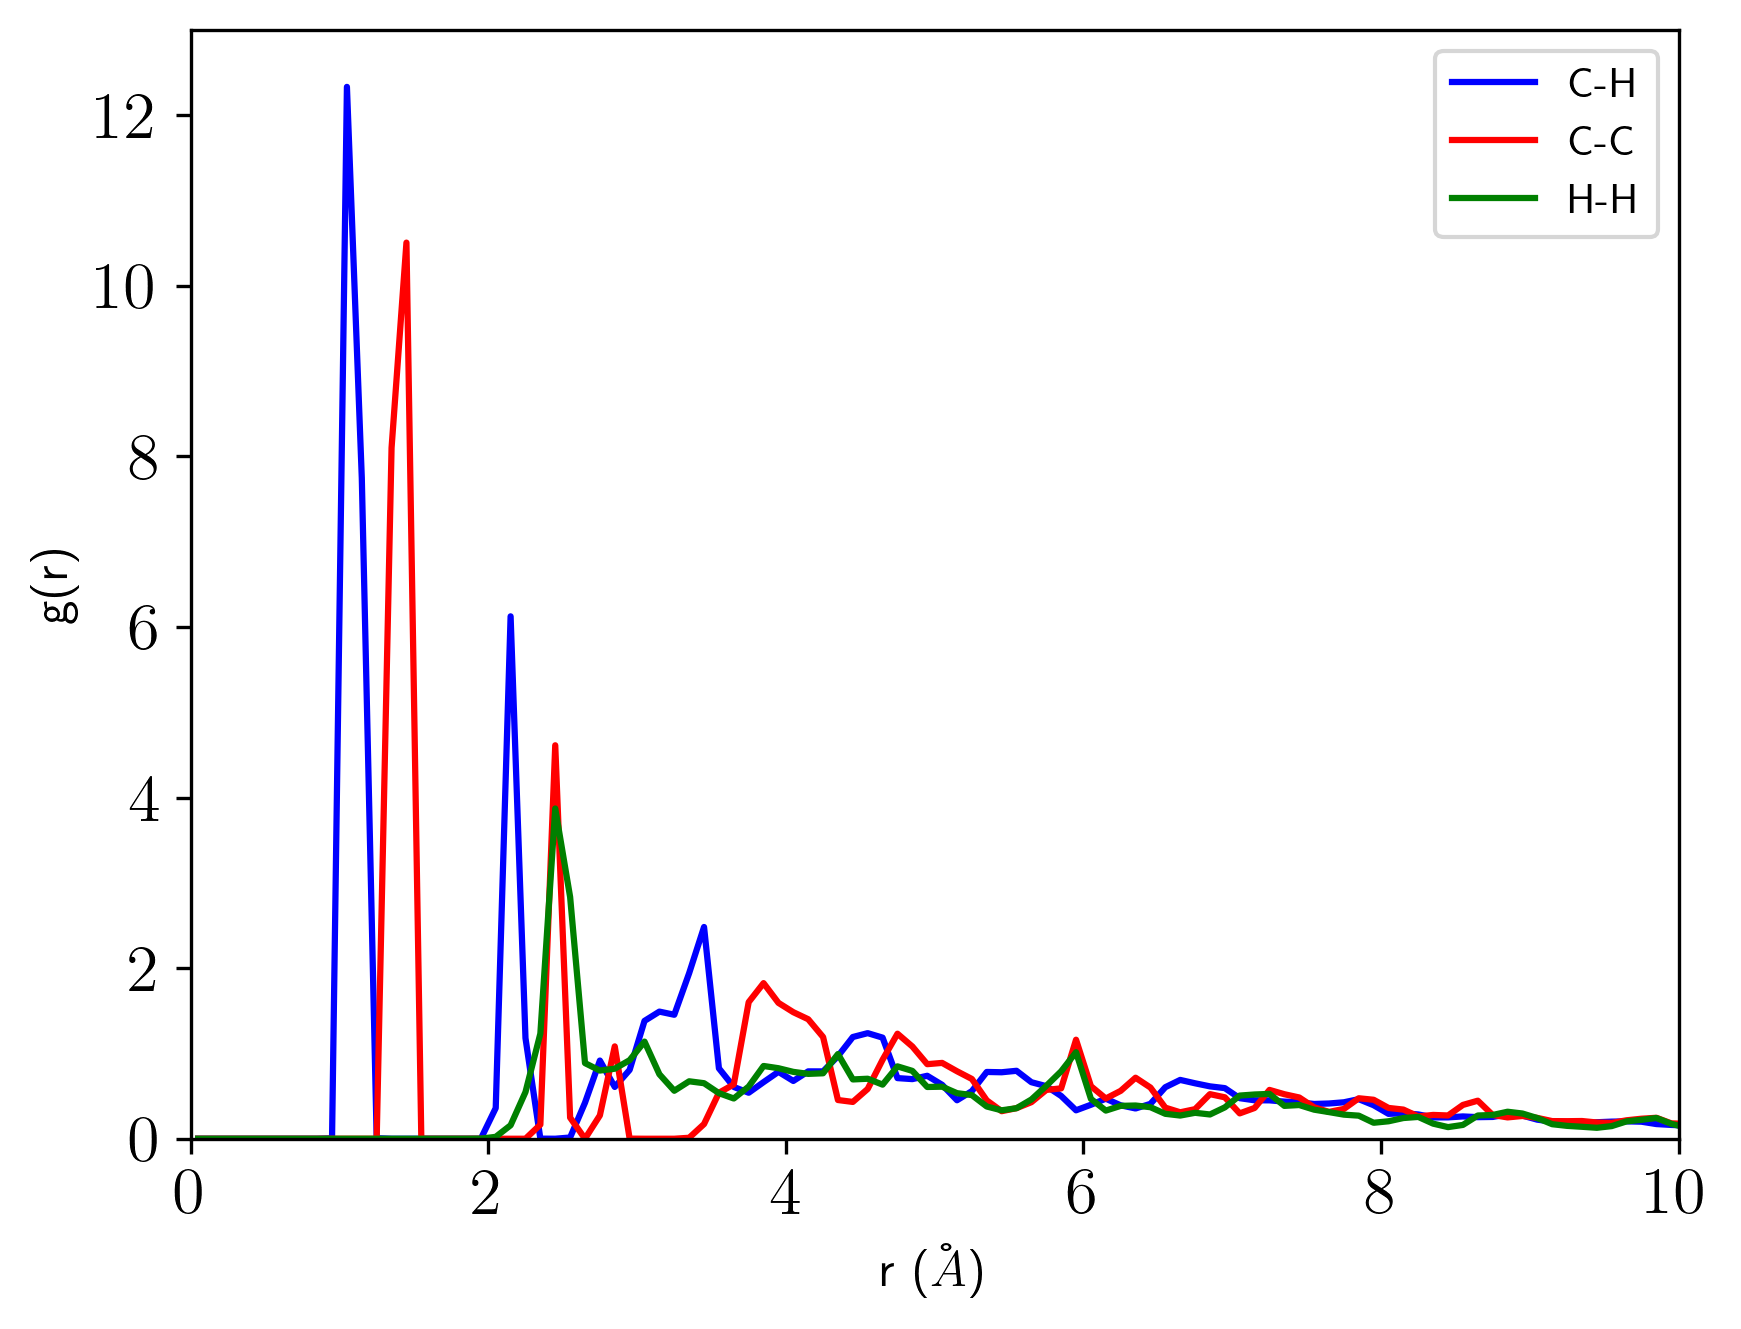

In [84]:
# plt.figure(dpi = 300)
# cc = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/post_MD/crystal_naph/nvt_120K/1-2-2/gofr-c-c.dat')
# ch = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/post_MD/crystal_naph/nvt_120K/1-2-2/gofr-c-h.dat')
# hh = np.loadtxt('/Users/shubhamdongriyal/my-drive/SabIA/HDNNP/Naphthalene/post_MD/crystal_naph/nvt_120K/1-2-2/gofr-h-h.dat')

# plt.plot(ch[:, 0], ch[:, 1], color = 'b', label = 'C-H')
# plt.plot(cc[:, 0], cc[:, 1], color = 'r', label = 'C-C')
# plt.plot(hh[:, 0], hh[:, 1], color = 'g', label = 'H-H')
# plt.xlim(0, 10)
# plt.ylim(0, 13)
# plt.ylabel(r'g(r)', fontsize = 12)
# plt.xlabel(r'r ($\AA$)', fontsize = 12)
# plt.legend()
# plt.show()


